In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix, classification_report

In [23]:
# Reading the data
df = pd.read_csv("/content/drive/MyDrive/AFAME TECHNOLOGIES/spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [24]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label'] = df.label.map({'ham' : 0, 'spam' : 1})
df.head()


,label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='label', y='Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

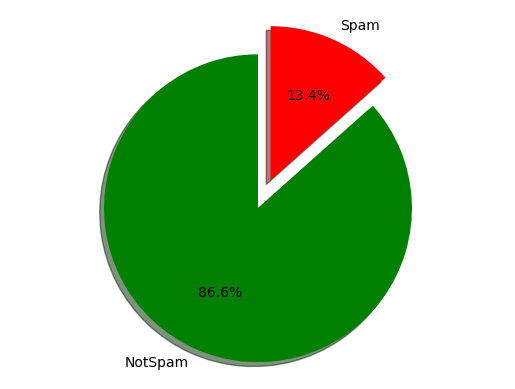

In [25]:
count_Class = pd.value_counts(df.label, sort = True)

# Data to Plot
labels = 'NotSpam', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['green', 'red']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [26]:
X_train, X_test, y_train, y_test = tts(df['Text'], df['label'], test_size=0.2, random_state=1)

In [27]:
count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

In [28]:
Mnb = MultinomialNB()
Mnb.fit(train_data, y_train)

MultinomialNB()

In [29]:
MnbPredicts = Mnb.predict(test_data)

In [30]:
print("The accuracy of our Naïve Bayes multinomial model is {} %".format(accuracy_score(y_test, MnbPredicts) * 100))
print("The Precision of our Naïve Bayes multinomial model is {} %". format(precision_score(y_test, MnbPredicts)* 100))
print("The Recall of our Naïve Bayes multinomial model is {} %" . format(recall_score(y_test, MnbPredicts)* 100))


The accuracy of our Naïve Bayes multinomial model is 98.47533632286995 %
The Precision of our Naïve Bayes multinomial model is 94.20289855072464 %
The Recall of our Naïve Bayes multinomial model is 93.5251798561151 %


In [31]:
!pip install scikit-plot


The accuracy of Naive Bayes clasifier is 98.47533632286995%

 [[968   8]
 [  9 130]]


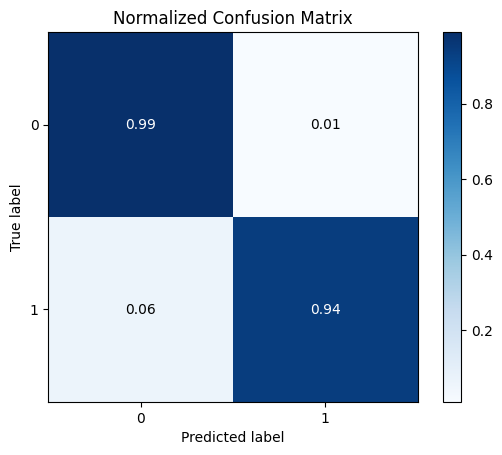

In [32]:
import scikitplot as skplt
confusionmatrix = confusion_matrix(y_test, MnbPredicts)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy_score(y_test, MnbPredicts) * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(y_test, MnbPredicts, normalize = True)
plt.show()

# Now we want to test our model mbn with a new Sms/Email massage

If the output is 0, it means that the input message is not spam, and if it is 1, it means that message has been spam.

In [42]:
new_test_sample_ham = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

In [39]:
new_test_sample_spam= ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]

In [43]:
new_test_sample_ham_vectorized = count_vector.transform(new_test_sample_ham)

In [40]:
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)

In [44]:
sample_predict = Mnb.predict(new_test_sample_ham_vectorized)
sample_predict

array([0])

In [41]:
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
sample_predict

array([1])